Link to PCW: https://course-resources.minerva.kgi.edu/uploaded_files/mke/00129520-1460/pre-class-work.pdf

In [2]:


%matplotlib inline

import numpy as np
import scipy as sp
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

def t_dist(x):
    a = norm(-4,0.5)
    b = norm(4,1)
    return a.pdf(x)+b.pdf(x)

def sampler(mu_init=.5, samples = 1000, p_scale=1):
    mu_current = mu_init
    posterior = [mu_current]
    accepted = 0

    for i in range(samples):
        mu_proposal = norm(mu_current, p_scale).rvs()

        p_current = t_dist(mu_current)
        p_proposal = t_dist(mu_proposal)

        p_accept = p_proposal/p_current

        accept = np.random.rand() < p_accept

        if accept:
            mu_current = mu_proposal
            accepted += 1

        posterior.append(mu_current)
        acc_r = accepted/samples
    return acc_r, posterior

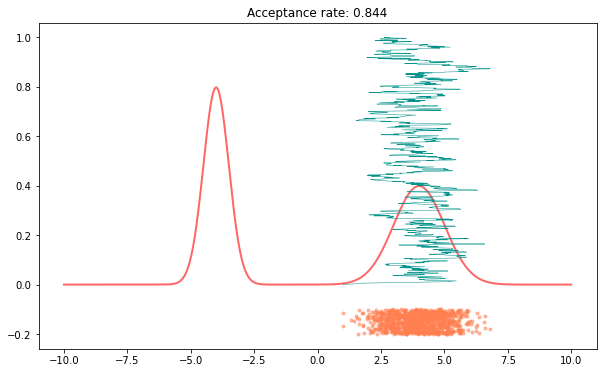

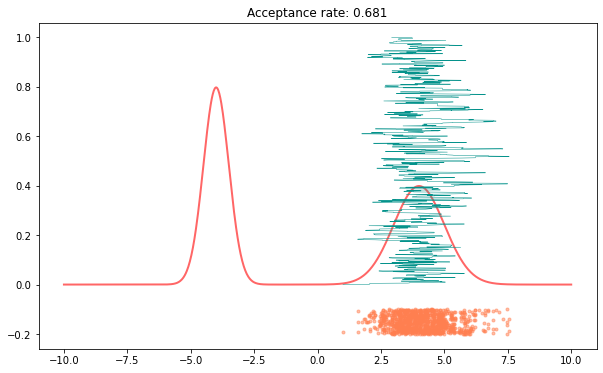

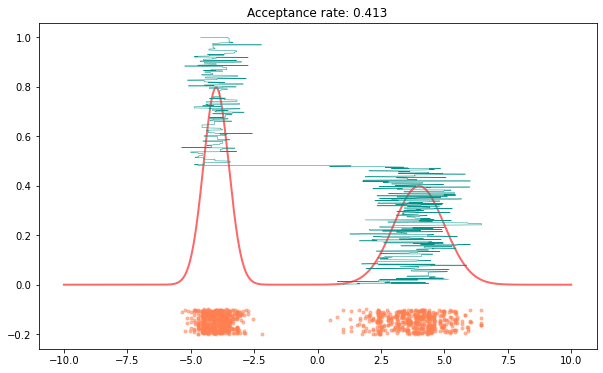

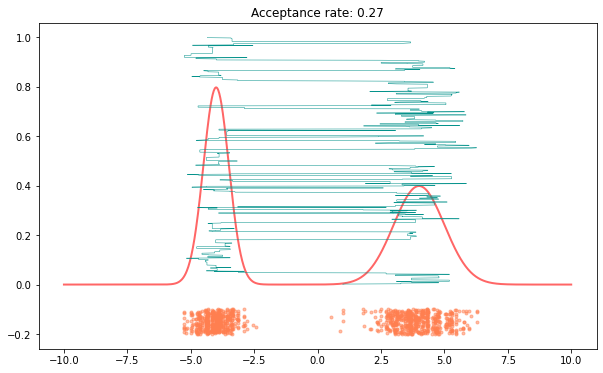

In [11]:
proposal_width = [0.5,1,2,4]
x = np.linspace(-10,10,1000)
y = np.linspace(0,1,len(posterior))


for width in proposal_width:
    acc_r, posterior = sampler(mu_init=1, p_scale=width)
    plt.figure(figsize = (10,6))
    plt.plot(x, t_dist(x), 'r-', lw=2, alpha=0.6)
    plt.plot(posterior, sp.stats.uniform.rvs(loc=-0.2, scale=0.1, size=len(posterior)),'.', alpha=0.5, color = 'coral')
    plt.plot(posterior, y,color="#04928B",linewidth = 0.5)
    plt.title("Acceptance rate: "+str(acc_r))

### Behavior of Ɛ
For Ɛ = 0.5 and Ɛ = 1: our scale isn't large enough to allow for the random walk to explore possibilites of finding samples in the lower half of the sample space, and thus we only generate values from the distribution that our walk first encountered.


For Ɛ = 2 and Ɛ = 4: our scale is large enough to be able to explore more of the sample space, which ultimately led it to the other part of the sample space which is sampled by a different distribution.

### Relationship of Ɛ with acceptance rate
We can see as the scale goes up, the acceptance rate goes down, and in our case, lower acceptance rate has led to better recreation of the posterior.

### Best value of Ɛ
Somewhere between 2 and 4 would be best because 2 could also be too low and there could be situations wherein we are unable to reach other parts of the sample space. 